0
1
2


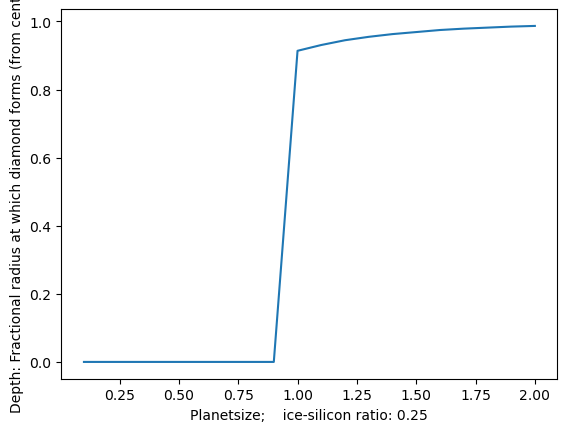

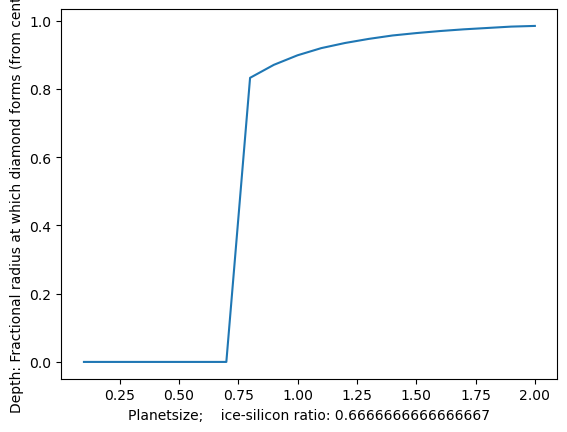

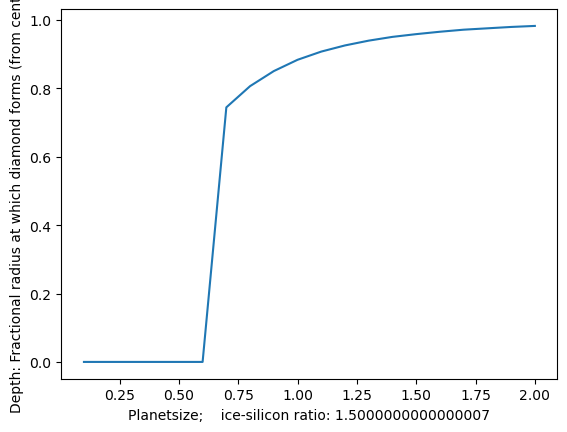

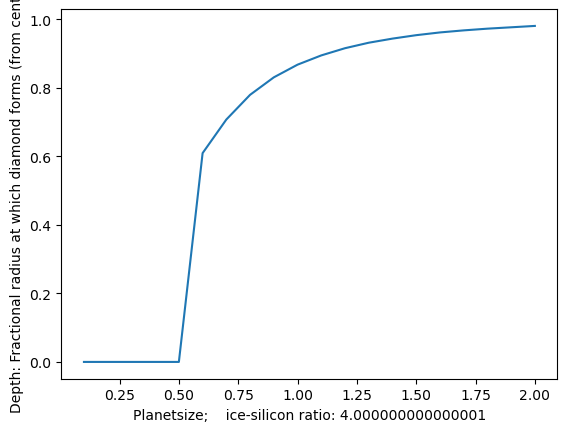

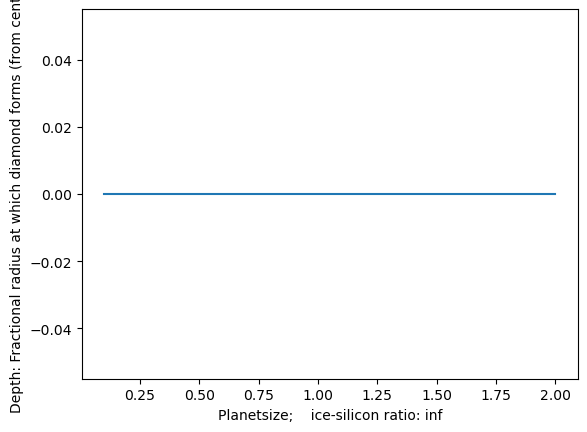

In [133]:
%run ice_ball_dictionary.ipynb
%run looped_solver_2.ipynb

r_earth = 6370 * (10 ** 3)

def at_what_depth(earth_rads, iron_part, sio2_part, slices = 1000, allowed_discrepancy = 1):

    radius = earth_rads * r_earth
    
    insert_dict = ice_ball_dictionary(earth_rads, iron_part, sio2_part)
    radii_list = [*range(1, int(radius), int(radius / slices))]
    
    pressures = Solver(radii_list, insert_dict)[1]
    diamond_pressures = []
    for p in pressures:
        if p > 10 * (10 ** 9):
            r_index_of_p = pressures.index(p)
            r_for_p = radii_list[r_index_of_p]
            if r_for_p >= list(insert_dict.keys())[1]:
                diamond_pressures.append(p)
    if diamond_pressures == []:
        return(0)
    else:
        min_diamond_pressure = min(diamond_pressures)
        diamond_rad_index = pressures.index(min_diamond_pressure)
        diamond_rad = radii_list[diamond_rad_index]
        ratio = diamond_rad / (max(radii_list))
        #print('ratio of most shallow point of diamond formation to total radius is:', ratio)
        #print('diamonds begin to form at a radius of:', diamond_rad, '. Ie diamonds start to form ', max(radii_list) - diamond_rad, 'below the surface\n')
        return(ratio)





#for ice in np.arange(0.1, 0.6, 0.1):
    silicon = 0.5 - ice
    iron = 0.5
    r_depth_data_to_plot = []

    if silicon == 0:
        ice_silicon_ratio = 'inf'
    else:
        ice_silicon_ratio = ice / (0.5 - ice)
    
    for planetsize in np.arange(0.1, 2.1, 0.1):
        
        radius = planetsize * r_earth

        radii_list = [*range(1, int(radius), int(radius / 1000))]

        depth = at_what_depth(planetsize, iron, silicon)
        radius_depth_tuple = (planetsize, ice_silicon_ratio, depth)
        r_depth_data_to_plot.append(radius_depth_tuple)

    data = r_depth_data_to_plot
    
    
    x_val = [x[0] for x in data]
    y_val = [x[2] for x in data]
    
    f = plt.figure()
    plt.plot(x_val, y_val)
    plt.xlabel(f'Planetsize;    ice-silicon ratio: {ice_silicon_ratio}')
    plt.ylabel('Depth: Fractional radius at which diamond forms (from center)')
    
    plt.show()
    
    f.savefig(f"diamond_depth_vs_planet_size_at_ice_silicon_ration_of_{ice_silicon_ratio}.pdf", bbox_inches='tight')